# Tensorflow Input Pipeline
## What is the Tensorflow Input Pipeline?
The input pipeline is a quick and easy utility provided in tf.dataapi to make complex input pipelines from simple and reusable codes and all in few lines of code. It also allows handling a large amount of data, thus giving low-end machines an advantage in computing them.

It does it by wrapping the data into tf.data.dataset class and performing a series of operations on them called `ETL - Extract, Transform, Load`.

![Screenshot from 2024-06-18 13-29-47.png](<attachment:Screenshot from 2024-06-18 13-29-47.png>)
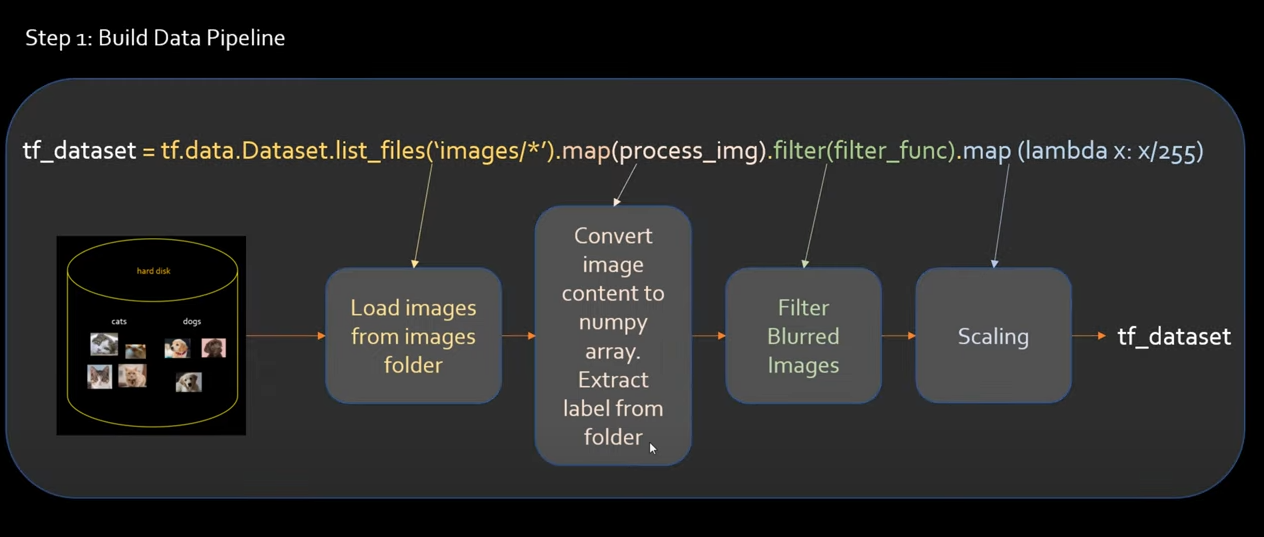

- We can load text files, spreadsheet, images. we can load any kind of data, even from cloud.
- After loding data we can use data input pipeline for doing batch loading, shuffling, filtering , mapping and all of this is called ETL extract-transform-load.
- In the end we get model which we can fit into our tensorflow model. Let's see in the image below: 

![Screenshot from 2024-06-18 13-41-56.png](<attachment:Screenshot from 2024-06-18 13-41-56.png>)
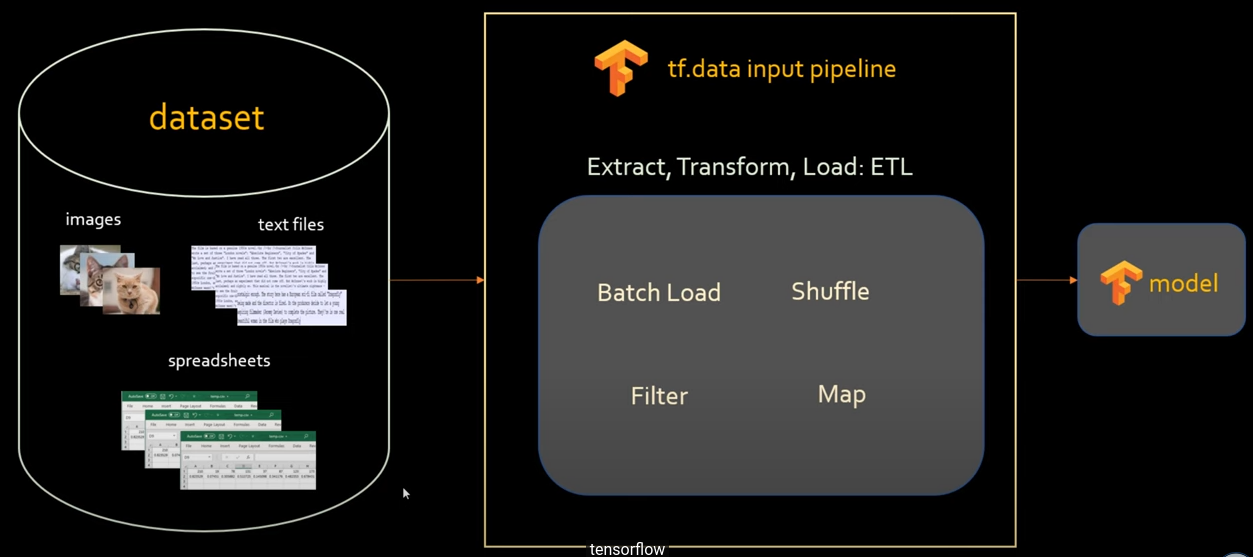

## What Are The Benefits

The benefits of using it are as follows:

#### 1. Loading data: 
Data is loaded in chunks in tf.data.dataset structure or batches, allowing huge data to be managed and loaded while retaining memory space. Also, It allows support for different data formats and types including cloud storage (S3).

#### 2. Data manipulation/ augmentation:
In general this is done with Pandas, Numpy -text / tabular/ numerical data, or Keras ImageDataGenerator / OpenCV-image data. But here, it can be performed in the input pipeline itself, allowing faster and rapid prototyping while coding. Filtering, mapping, resizing, cropping are to name a few.

#### 3. Distributed Computing:
 It supports distributed and parallel computing for enterprises which is essential for cloud computing and big data.

### Note:- Tensors are the underlying data structures behind tf.data.dataset`, so it's different from NumPy arrays or Pandas dataframe. Don’t get mistaken.

### Let's dive into example.


In [38]:
# library
import tensorflow as tf

## Create tf dataset from a list


In [39]:
daily_sales = [20, 25, 31, -12, 18, -111, 39, 28]
tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales)
tf_dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [40]:
# Iterate through dataset:
for data in tf_dataset:
    print(data)

tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)
tf.Tensor(-12, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(-111, shape=(), dtype=int32)
tf.Tensor(39, shape=(), dtype=int32)
tf.Tensor(28, shape=(), dtype=int32)


2024-06-18 14:34:28.287324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Individuals tensors in our dataset

In [41]:
for data in tf_dataset:
    print(data.numpy())

20
25
31
-12
18
-111
39
28


2024-06-18 14:34:29.932577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Iterate through elements as numpy elements


In [42]:
for data in tf_dataset.as_numpy_iterator():
    print(data)

20
25
31
-12
18
-111
39
28


2024-06-18 14:34:31.581098: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Iterate through first 3 elements in tf dataset


In [43]:
for data in tf_dataset.take(3):
    print(data.numpy())

20
25
31


2024-06-18 14:34:33.561555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [44]:
# Filter sales number that are less than 0

less_than_0 = [x for x in tf_dataset.as_numpy_iterator() if x < 0]
less_than_0

2024-06-18 14:34:34.661957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[-12, -111]

In [45]:
# Filter sales number that are greater than 0

tf_dataset = tf_dataset.filter(lambda x: x>0)

for sales in tf_dataset:
    print(sales.numpy())

20
25
31
18
39
28


2024-06-18 14:34:36.594557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Convert sales numbers from USA dollars ($) to Nepali Rupees (NR) Assuming 1->106 conversation rate




In [46]:
into_nepali = [x*106 for x in tf_dataset.as_numpy_iterator() ]
for rs in into_nepali:
    print(rs)

2120
2650
3286
1908
4134
2968


2024-06-18 14:34:41.608791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [47]:
# Using Lambda

tf_dataset = tf_dataset.map(lambda x: x *106)
# print(tf_dataset.as_numpy_iterator())
for data in tf_dataset.as_numpy_iterator():
    print(data)

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x76c16d93c260>)
2120
2650
3286
1908
4134
2968


2024-06-18 14:34:58.521090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [51]:
# Shuffe

tf_dataset = tf_dataset.shuffle(3)

for i in tf_dataset.as_numpy_iterator():
    print(i)
# for data in tf_dataset:
#     print(data)

2120
2968
3286
4134
1908
2650


2024-06-18 14:35:37.831831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [54]:
# Batching

for sales_batch in tf_dataset.batch(3):
    print(sales_batch.numpy())


[3286 2968 2650]
[2120 4134 1908]


2024-06-18 14:35:53.024636: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Perform all of the above operations in one shot


In [64]:
tf_dataset1 = tf.data.Dataset.from_tensor_slices(daily_sales)

In [65]:
tf_dataset1 = tf_dataset1.filter(lambda x: x>0).map(lambda x: x*106).shuffle(3).batch(3)

for i in tf_dataset1.as_numpy_iterator():
    print(i)

Cause: could not parse the source code of <function <lambda> at 0x76c169d800e0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: x * 106

Match 1:
lambda x: x > 0

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x76c169d800e0>: found multiple definitions with identical signatures at the location. This error may be avoided by defining each lambda on a single line and with unique argument names. The matching definitions were:
Match 0:
lambda x: x * 106

Match 1:
lambda x: x > 0

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x76c169d81ee0>: found multiple definitions with identical signatures at the l

2024-06-18 14:44:12.047491: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [66]:
images_ds = tf.data.Dataset.list_files('images/*/*', shuffle=False)


## Let's do same what we did above for this image dataset

In [67]:
len(images_ds)

140

In [68]:
type(images_ds)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [69]:
for image in images_ds.take(5):
    print(image.numpy())

b'images/cats/cat_1.jpg'
b'images/cats/cat_106.jpg'
b'images/cats/cat_109.jpg'
b'images/cats/cat_113.jpg'
b'images/cats/cat_114.jpg'


2024-06-18 14:50:59.092708: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [76]:
# Let's shuffle and take 5 image

images_ds = images_ds.shuffle(100)
for image in images_ds.take(5):
    print(image.numpy())

b'images/cats/cat_109.jpg'
b'images/dogs/dog_302.jpg'
b'images/dogs/dog_377.jpg'
b'images/cats/cat_96.jpg'
b'images/cats/cat_118.jpg'


2024-06-18 15:08:33.011460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


We got different from above.

In [87]:
class_names = ['dogs', 'cats']


### Splitting image into training and testing

In [80]:
size_of_img = len(images_ds)
size_of_img

140

In [83]:
train_size = int(size_of_img*0.8) # 80% of training
train_ds = images_ds.take(train_size)


# Since we have training dataset, we can simply use skip function to get test_ds
test_ds = images_ds.skip(train_size)

In [84]:
len(train_ds)

112

In [85]:
len(test_ds)

28

In [88]:
# Function to get label i.e cat and dog

def get_label(file_path):
    import os
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2]

In [89]:
get_label("b'images/cats/cat_290.jpg'")

<tf.Tensor: shape=(), dtype=string, numpy=b'cats'>

In [90]:
def process_image(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path) # read file
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128]) # resize into same size


    return img, label

In [86]:
# structure of our file in train_ds
for i in train_ds.take(5):
    print(i.numpy())

b'images/cats/cat_290.jpg'
b'images/cats/cat_542.jpg'
b'images/dogs/dog_59.jpg'
b'images/dogs/dog_227.jpg'
b'images/dogs/dog_219.jpg'


2024-06-18 15:15:21.513252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [94]:
train_ds = train_ds.map(process_image)

for img, lablel in train_ds.take(3):
    print("image: ", img)
    print('Label: ', lablel)

image:  tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(128, 128, 3), dtype=float32)
Label:  tf.Tensor(b'cats', shape=(), dtype=string)
image:  tf.Tensor(
[[[  5.          5.          5.609375 ]
  [  3.4757996   2.6469116   7.3632812]
  [  2.609375    1.0195312  10.7890625]
  ...
  [ 71.195

2024-06-18 20:48:18.879313: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [95]:
def scale(image, label):
    return image/255, label

In [96]:
train_ds = train_ds.map(scale)

for image, label in train_ds.take(5):
    print("****Image: ", image.numpy()[0][0])
    print("**** label: ", label.numpy())

****Image:  [0.00392157 0.00392157 0.00392157]
**** label:  b'dogs'
****Image:  [0.38889495 0.67754483 0.31323627]
**** label:  b'cats'
****Image:  [0.7764706 0.7921569 0.8039216]
**** label:  b'cats'
****Image:  [0.87058824 0.8745098  0.84313726]
**** label:  b'dogs'
****Image:  [0. 0. 0.]
**** label:  b'cats'


2024-06-18 20:50:03.362747: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
